Unsupervised Machine Learning

Assignment 3

SAI KUMAR MURARSHETTI

LEWIS ID: L30079224

**1. Technical Description:**

**Principal Component Analysis (PCA):** It is an useful statistical and machine learning technique that reduces dataset dimensionality while keeping data variance. It performs this by changing the original variables into a new set of transverse variables known as principle components. These principle components are linear combinations of the original variables sorted by the amount of variance they explain in the data. PCA works to identify the directions (principal components) in which the data shifts the most. It achieves this by calculating the eigenvectors of the data's covariance matrix and projecting the data on these eigenvectors.

**Linear Discriminant Analysis (LDA):** It is an unsupervised technique that decreases dimensionality and improves class separation. It performs this by identifying the linear combinations of variables (discriminants) that most accurately identify the classes in the data. With PCA, which aims to maximize variance, LDA is focused on maximizing between-class variation while decreasing within-class scatter.

In [ ]:
#Importing numpy,pandas,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Loading the dataset
data = pd.read_csv('Traffic.csv')

In [ ]:
# Performing PCA on the count of columns (CarCount, BikeCount, BusCount, TruckCount)
X = data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']]
# 'Traffic Situation' is the target variable
y = data['Traffic Situation']

2. Algorithm Design:

The covariance matrix for the standard data is determined. The covariance matrix contains information about the relationships between variables.
The eigenvectors and eigenvalues of the covariance matrix are determined. Eigenvectors denote the directions of maximal variation while eigenvalues define the quantity of variance in these directions.

In [ ]:
# Computing covariance matrix for PCA
cov_matrix = np.cov(X, rowvar=False)

# Computing eigenvectors and eigenvalues for PCA
eig_values_pca, eig_vectors_pca = np.linalg.eig(cov_matrix)

The eigenvectors corresponding to the largest eigenvalues (principal components) are selected. These important factors explain a significant portion of the data variance.

*  Sorted_indices_pca = np.argsort(eig_values_pca)[::-1]. This line determines the numbers that are used for sorting the eigenvalues in descending order. np.argsort returns the index that was used to sort the array, and [::-1] reverses the order to sort in descending order. These indices are kept in sorted_indices_pca.

*   Eig_values_pca = eig_values_pca[sorted_indices_pca] This line sorts the eigenvalues based on the sorted indices gained in the following phases. So, follow this line, eig_values_pca will have the eigenvalues in descending order.

*  eig_vectors_pca is equal to[:, ordered_indices_pca]: This line arranges the eigenvectors correctly. Because each column in eig_vectors_pca represents an eigenvector, it rearranges them to correspond to the sorted eigenvalues. The [:, sorted_indices_pca] component ensures that each column is reordered accordingly to the sorted_indices_pca.

In [ ]:
# Sorting eigenvalues and eigenvectors for PCA
sorted_indices_pca = np.argsort(eig_values_pca)[::-1]
eig_values_pca = eig_values_pca[sorted_indices_pca]
eig_vectors_pca = eig_vectors_pca[:, sorted_indices_pca]

PCA_1d = np.dot(X, eig_vectors_pca[:,:1]): calculates the projection of the original data, X, into the first principal component. eig_vectors_pca[:,:1] selects only the first eigenvector (which corresponds to the direction of maximum variance), and np.dot(X, eig_vectors_pca[:,:1]) computes the dot product of the original data matrix X with this eigenvector.

In [ ]:
# Selecting top 1, 2, and 3 principal components for PCA
pca_1d = np.dot(X, eig_vectors_pca[:, :1])
pca_2d = np.dot(X, eig_vectors_pca[:, :2])
pca_3d = np.dot(X, eig_vectors_pca[:, :3])

This NumPy function returns the array's unique elements while maintaining their order. In this context, y is taken to represent an array or list of class labels for each sample in a binary classification issue. For instance, if y has the labels [0, 1, 1, 0, 1], then np.unique(y) returns [0, 1], indicating that the dataset contains two unique class labels. In a binary classification situation, it is usual to have two class labels, which are typically represented as 0 and 1, with each label representing one of the two classes being predicted

In [ ]:
# Assuming binary classification for simplicity
class_labels = np.unique(y)

Generate the mean vector for each class in the dataset.

Determine the within-class scatter matrix, which represents the variability within each class.

Evaluate the between-class scatter matrix, which shows the variation between classes.

In [ ]:
# Calculated class means for LDA
class_means = [np.mean(X[y == label], axis=0) for label in class_labels]

# Computing within-class scatter matrix for LDA
within_class_scatter_matrix = np.sum([np.cov(X[y == label], rowvar=False) for label in class_labels], axis=0)

# Computing between-class scatter matrix for LDA
overall_mean = np.mean(X, axis=0)
between_class_scatter_matrix = np.sum([np.outer(class_means[i] - overall_mean, class_means[i] - overall_mean) for i in range(len(class_labels))], axis=0)

Figure out the eigenvectors and eigenvalues for the matrix Sw^-1 * Sb, where Sw is the within-class scatter matrix and Sb is the between-class scatter matrix.

For creating the projection matrix, select the eigenvectors that correspond to the biggest eigenvalues.

In [ ]:
# Computing eigenvectors and eigenvalues of (inverse of within-class scatter matrix) times (between-class scatter matrix)
eig_values_lda, eig_vectors_lda = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
# Sorting eigenvalues and eigenvectors for LDA
sorted_indices_lda = np.argsort(eig_values_lda)[::-1]
eig_values_lda = eig_values_lda[sorted_indices_lda]
eig_vectors_lda = eig_vectors_lda[:, sorted_indices_lda]
# Selecting top 1 discriminant component for LDA
lda_1d = np.dot(X, eig_vectors_lda[:, :1])

**3. Results of the Algorithms:**
Performing Principal Component Analysis (PCA) on a dataset. The PCA observations are shown in three subplots that indicate the data's projection into 1D, 2D, and 3D spaces.

Text(0.5, 1.0, 'PCA 3-Dimensional')

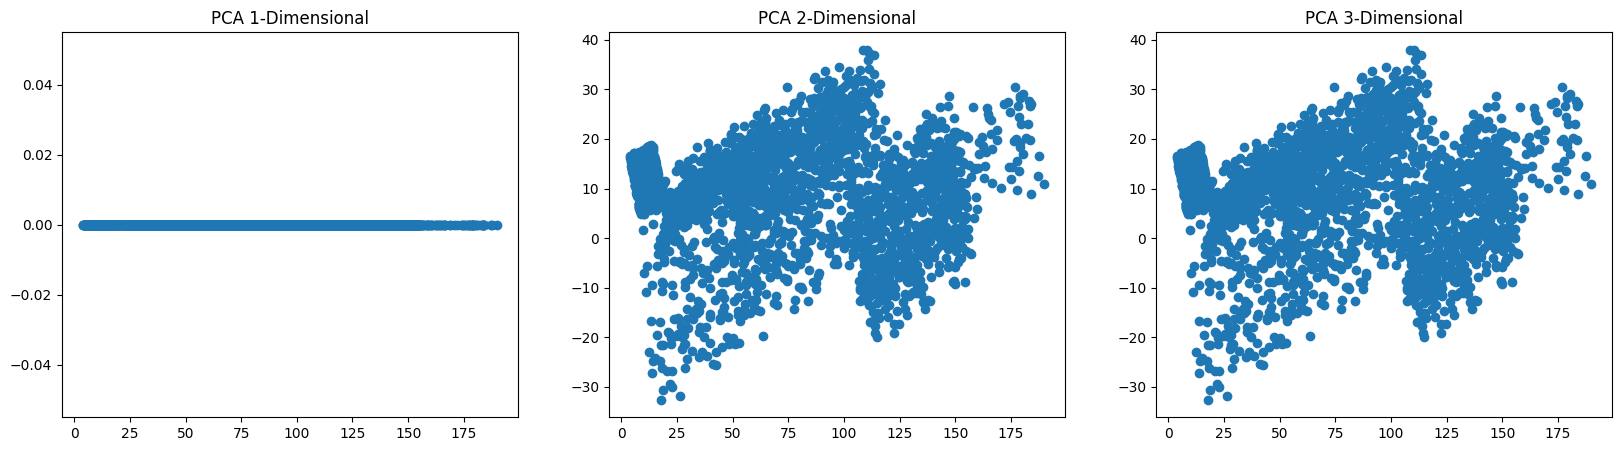

In [ ]:
# Plotting results for PCA
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# PCA plots
axs[0].scatter(pca_1d, np.zeros_like(pca_1d))
axs[0].set_title('PCA 1-Dimensional')
axs[1].scatter(pca_2d[:, 0], pca_2d[:, 1])
axs[1].set_title('PCA 2-Dimensional')
axs[2].scatter(pca_3d[:, 0], pca_3d[:, 1])
axs[2].set_title('PCA 3-Dimensional')

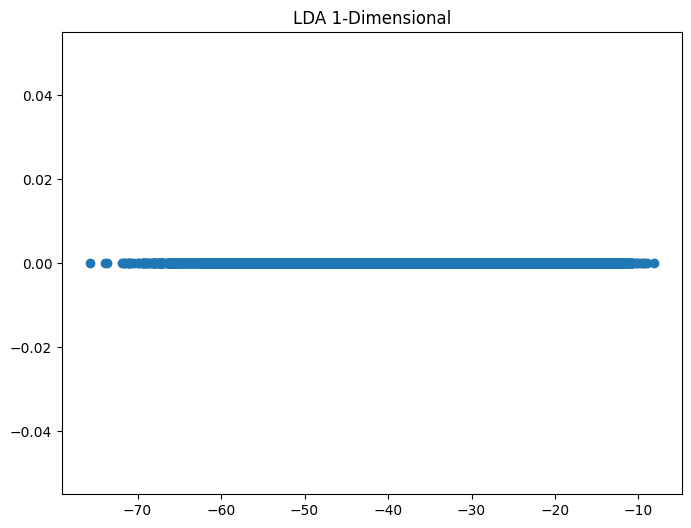

In [ ]:
# Applying LDA with 1 component
# Ploting result for LDA
plt.figure(figsize=(8, 6))
plt.scatter(lda_1d, np.zeros_like(lda_1d))
plt.title('LDA 1-Dimensional')
plt.show()
# Ploting result for LDA


## **Week 3**
---

**1. Technical Description:**

**Basic Sequential Clustering Algorithm (BSCA):** The Basic Sequential Clustering Algorithm (BSCA) is a clustering approach that assigns items sequentially to clusters based on a dissimilarity standards. If a point is sufficiently similar to an existing cluster, it is added to that cluster otherwise, a new cluster may be constructed while remaining within the maximum number of clusters allowed.


The Basic Sequential grouping Algorithm (BSCA) based on basic space separation is an original method for grouping data. The technique groups data sequentially into clusters based on the median value of the selected dimension, resulting in a balanced partitioning that can be particularly useful with particular dataset categories. The following section describes a modified version of BSCA, highlighting its application, design and future possibilities.

2. Algorithm Design:

---
*   If the current recursion depth equals the value provided in max_depth, or if the data size is less than or equal to 2, then the recursion stops and the current segment of data is returned as cluster.
*   For 2D data, it determines the variance across each dimension, then chooses the dimension in the highest variance (to ensure appropriate division) and determines the median value in that dimension.
*   For 1D data, the median value is calculated instantly.


In [ ]:
# Function for BSCA-inspired clustering
def binary_space_clustering(data, depth=0, max_depth=5):
    if depth == max_depth or len(data) <= 2:
        return [data]

    # Determining the dimension to split for 2D data from 1D, it's straightforward
    if data.ndim > 1:
        dim = np.argmax(np.var(data, axis=0))
        median = np.median(data[:, dim])
        left = data[data[:, dim] <= median]
        right = data[data[:, dim] > median]
    else:
        median = np.median(data)
        left = data[data <= median]
        right = data[data > median]

    left_clusters = binary_space_clustering(left, depth + 1, max_depth)
    right_clusters = binary_space_clustering(right, depth + 1, max_depth)

    return left_clusters + right_clusters

*   The data is divided into two portions based on its median value. For 2D data, the split is along the dimension with the greatest variance, whereas for 1D data, the split is directly on the median.
*   Recursive Clustering: Each split component is recursively sent to the binary_space_clustering function. which partitions it further until the initial case is satisfied.
*   The clusters generated when the left and right splits at each recursion level are merged then provided.

In [ ]:
# Applying BSCA clustering to PCA and LDA results
clusters_1d_pca = binary_space_clustering(pca_1d.flatten(), max_depth=3)

Applying the Basic Sequential Clustering Algorithm (BSCA) to Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) data is a new technique for analyzing the data's underlying structure after dimensionality reduction. This method supports in visualizing and analyzing clustering patterns that occur from data transformed to lower dimensions, whether it's the 1-dimensional or 2-dimensional outputs from PCA or the class-separability-focused results from LDA.

Clustering PCA: 1-Dimensional PCA

The application of BSCA on 1D PCA the results allow the identification of random groupings along the main component which reflects the greatest variance in the dataset. In reducing the PCA output to a 1-dimensional array and applying BSCA with an identified depth, we can split the continuous range of PCA values into separate clusters. This method involves the segmentation of data points with similar variance characteristics, providing insights into the intrinsic distribution of data.

In [ ]:
clusters_2d_pca = binary_space_clustering(pca_2d, max_depth=3)

Clustering PCA: 2-Dimensional PCA

For 2D PCA results, BSCA analyzes both dimensions and selects the one with the highest variance for each split. This multidimensional technique takes advantage of the binary spatial separating feature of BSCA, allowing for a more complex analysis of the data's structure. The algorithm's flexibility to deal with multidimensional inputs enables an in-depth analysis of the clusters generated inside the area defined by the two main components, showing complex linkages and groupings that are not visible in higher-dimensional conditions.


In [ ]:
clusters_1d_lda = binary_space_clustering(lda_1d.flatten(), max_depth=3)

1-Dimensional LDA (LDA):

Applying BSCA to 1D LDA results, which are currently designed for maximal class separability, provides an original perspective on data clustering potential when viewed through an understanding of class differentiation. The clustering results are able to either confirm the effectiveness of LDA to enhance class separability or identify additional substructures within the classes that may require additional analysis.

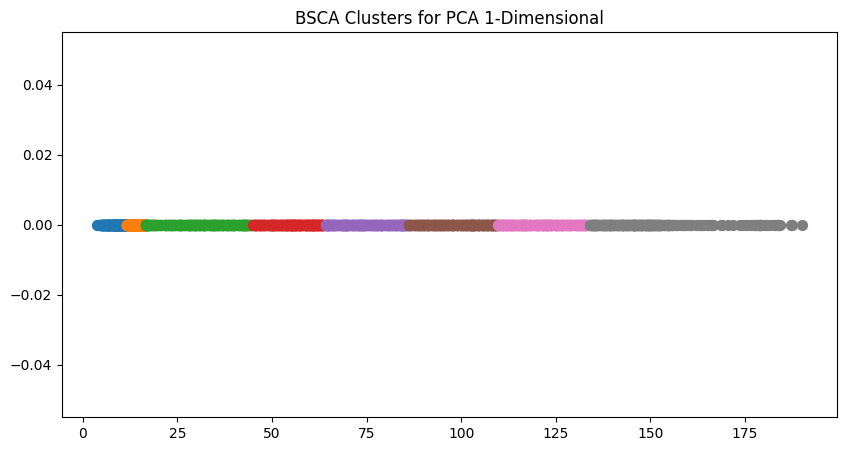

In [ ]:
# Visualization of BSCA Clusters
# For 1-D PCA
plt.figure(figsize=(10, 5))
for cluster in clusters_1d_pca:
    plt.scatter(cluster, np.zeros_like(cluster), s=50)
plt.title('BSCA Clusters for PCA 1-Dimensional')
plt.show()


After performing Bisecting Spectral Clustering Analysis (BSCA) and lowering data dimensionality with PCA. the algorithm visualizes data clusters on a single axis. It uses matplotlib for creating a scatter plot with each cluster's data points obtained along the X-axis at Y=0 showing the clustering distribution in a basic manner. The plot's description, 'BSCA Clusters for PCA 1-Dimensional', shows that it focused on displaying the way data is grouped using these analyses.

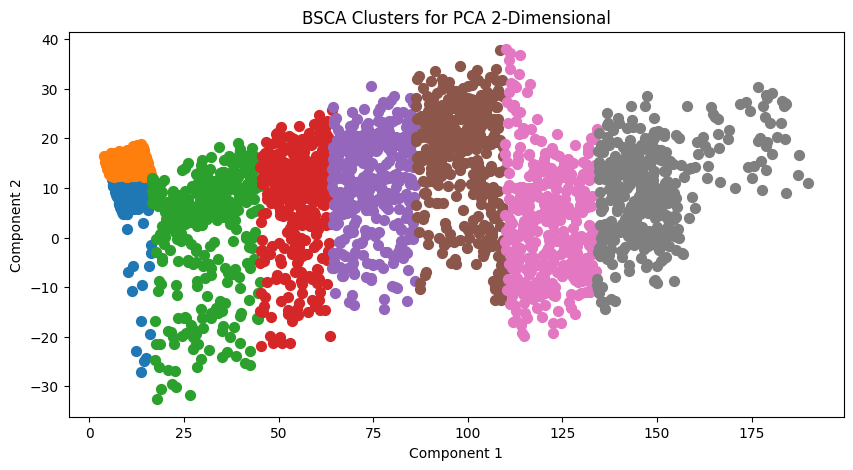

In [ ]:
# For 2-D PCA
plt.figure(figsize=(10, 5))
for cluster in clusters_2d_pca:
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50)
plt.title('BSCA Clusters for PCA 2-Dimensional')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

The above code sample sizes displays the 2-dimensional PCA observations of data clusters obtained using Bisecting Spectral Clustering Analysis (BSCA). It generates a scatter plot for each cluster with points plotted according to their values in the initial two main components. The plot measures 10x5 inches with each point set at 50 for explanation. The title 'BSCA Clusters for PCA 2-Dimensional', along with the labels for both axis ('Component 1' and 'Component 2'), clearly indicated the plot's objective and dimensions it represents, which provides a better understanding of the way data points are arranged in two-dimensional space.

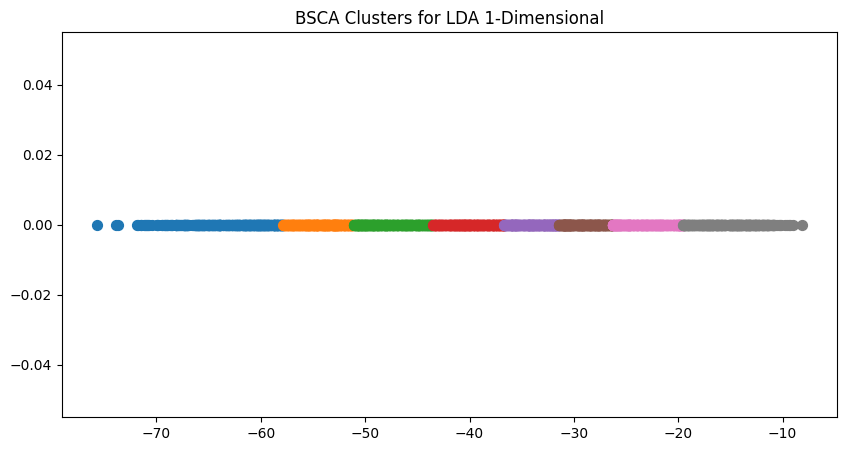

In [ ]:
# For 1-D LDA
plt.figure(figsize=(10, 5))
for cluster in clusters_1d_lda:
    plt.scatter(cluster, np.zeros_like(cluster), s=50)
plt.title('BSCA Clusters for LDA 1-Dimensional')
plt.show()


This code samples displays clusters on a one-dimensional axis after using Bisecting Spectral Clustering Analysis (BSCA) and Linear Discriminant Analysis to reduce data dimensionality. It shows each cluster's data points along a single axis with all points matched horizontal at Y=0, to show the clustering distribution following LDA. The plot, labeled 'BSCA Clusters for LDA 1-Dimensional', uses a scatter plot format with a figure size of 10x5 inches and a point size of 50, making it simple for analyzing the separation and distribution of clusters in the reduced dimensionality space.







In [ ]:
# Modified BSCA-inspired Clustering Function
def binary_space_clustering_modified(data, depth=0, max_depth=5, alpha=0.5, max_clusters=3, current_clusters=1):
    # Base conditions of recursion
    if depth == max_depth or len(data) <= 2 or current_clusters >= max_clusters:
        return [data]

    # Calculating the dissimilarity (here represented as variance)
    variance = np.var(data, axis=0) if data.ndim > 1 else np.var(data)

    # Checking if variance is below the threshold alpha for splitting
    if variance < alpha:
        return [data]

    # Performing the split
    if data.ndim > 1:
        dim = np.argmax(variance)
        median = np.median(data[:, dim])
        left = data[data[:, dim] <= median]
        right = data[data[:, dim] > median]
    else:
        median = np.median(data)
        left = data[data <= median]
        right = data[data > median]

    left_clusters = binary_space_clustering_modified(left, depth + 1, max_depth, alpha, max_clusters, current_clusters + 1)
    right_clusters = binary_space_clustering_modified(right, depth + 1, max_depth, alpha, max_clusters, current_clusters + 1)

    return left_clusters + right_clusters


The provided code presents a modified binary space clustering method based on Bisecting Spectral Clustering Analysis (BSCA) that maximizes efficiency for variance-based data splitting. It divides data continuously until it satisfies a specific recursive depth (max_depth), a minimum dataset size and a predetermined number of clusters (max_clusters). The algorithm analyzes data variance and uses it as an objective for splitting. if variance exceeds a threshold (alpha), the data is divided at the median of the most variable dimension. This procedure continues, possibly increasing the cluster count with each division, untill the base conditions keep any further splits. This method allows for adjustable clustering by altering the depth, variance threshold and cluster limits, which makes it ideal for a wide range of datasets and clustering needs.









3. The results of the algorithms


---

This code describes the use of a modified binary space clustering function on one-dimensional PCA data (pca_1d) with different dissimilarity requirements (alpha) and maximum cluster counts (max_clusters). It loops through variations of alpha values and max_clusters limitations, applying the clustering function to each situation and visualizing the results. Each visualization presents the clusters on a single axis, using scatter plots to show the cluster distributions, with plot titles based on the alpha and max_clusters values. This method allows to examine the way various parameter values influence the clustering outcome, making it easier to determine suitable clustering parameters for the given PCA-transformed data.


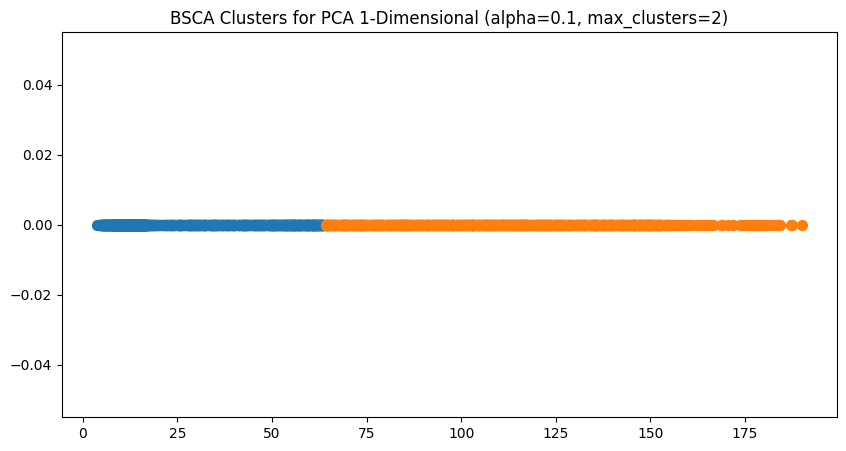

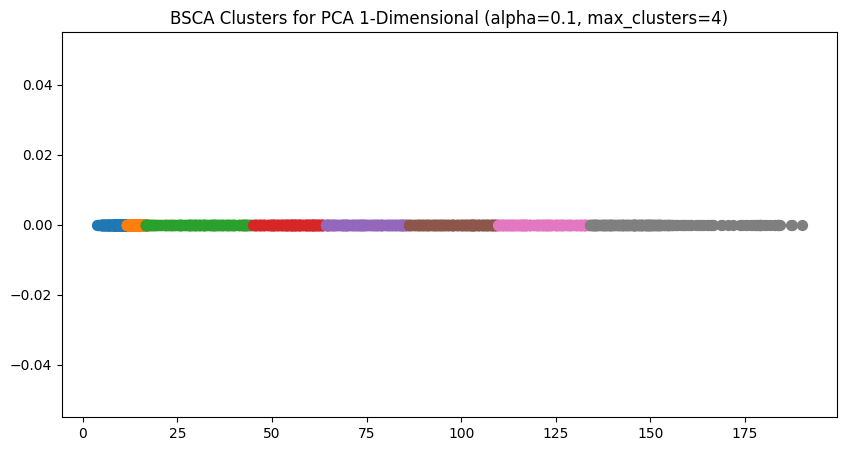

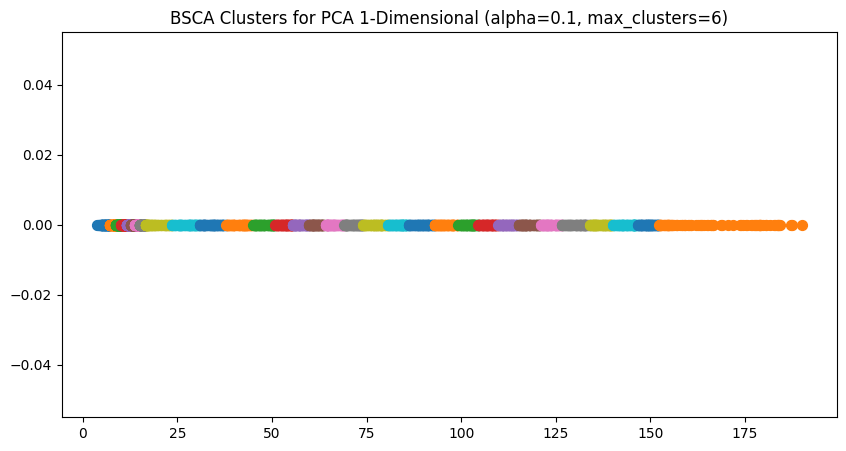

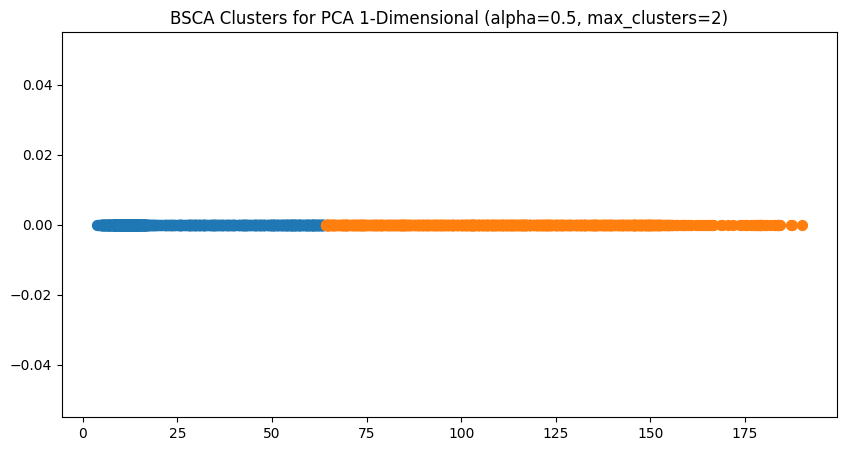

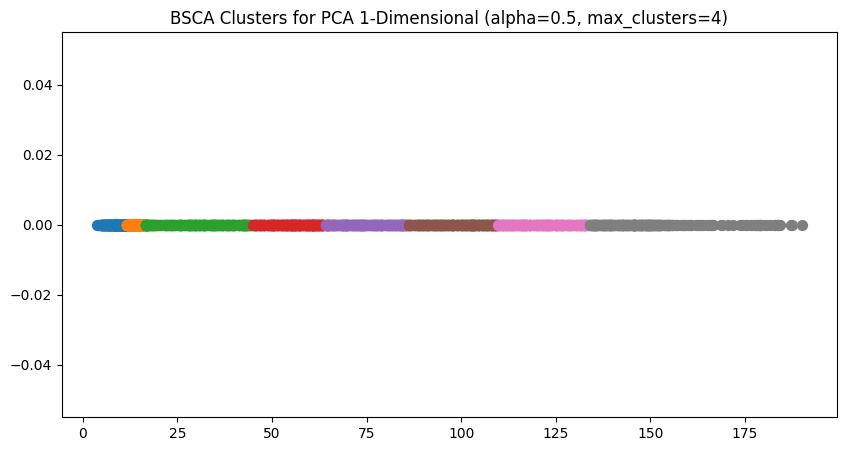

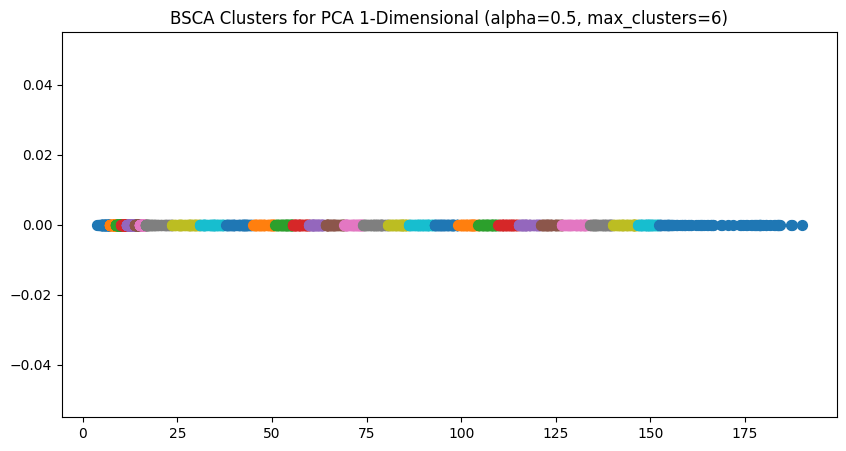

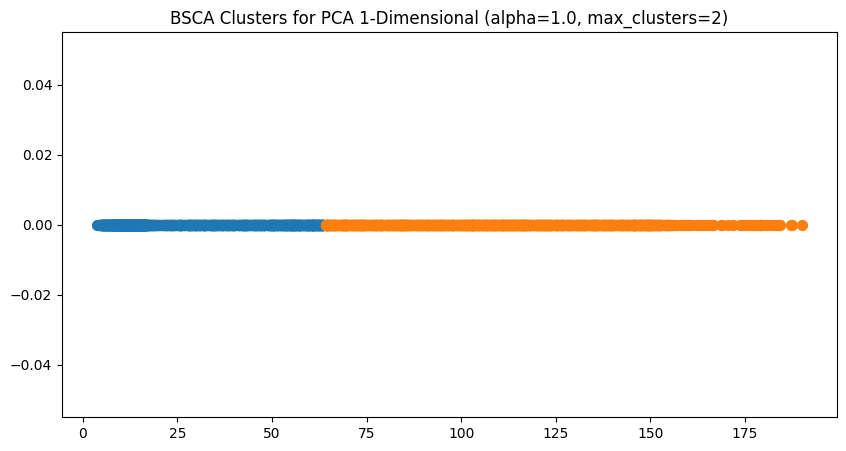

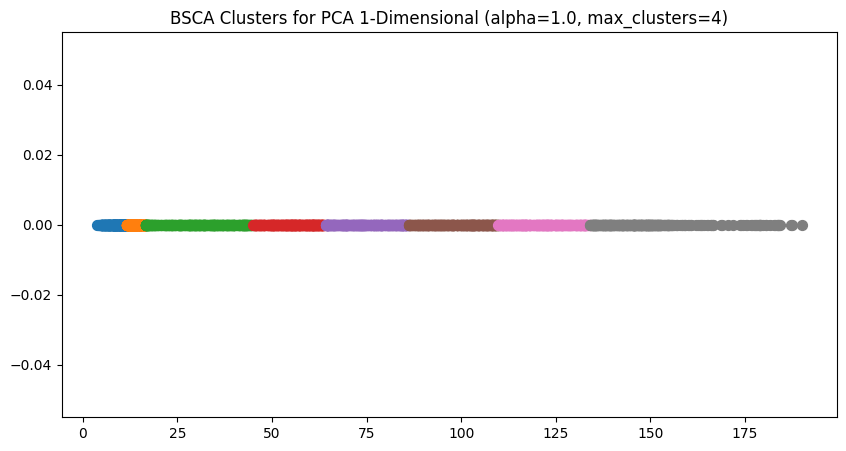

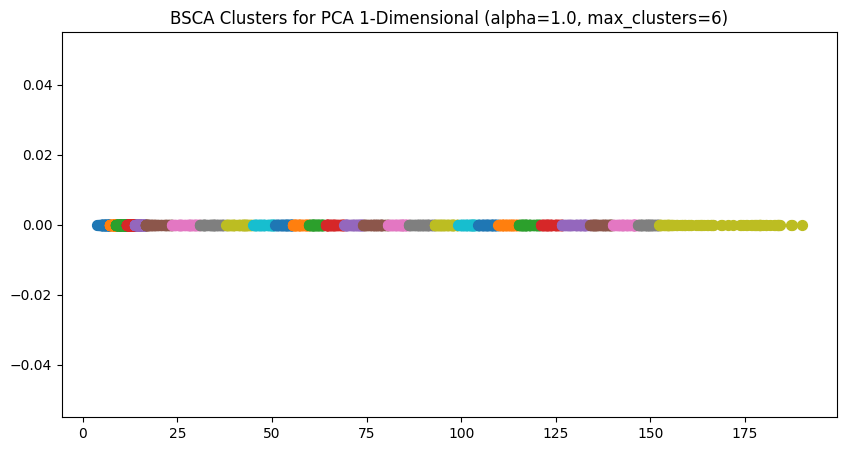

In [ ]:
# Example usage with PCA 1-Dimensional data (pca_1d) and three sets of parameters
alphas = [0.1, 0.5, 1.0]  #  Thresholds of dissimilarity
max_clusters_list = [2, 4, 6]  # Maximum numbers of clusters

for alpha in alphas:
    for max_clusters in max_clusters_list:
        clusters = binary_space_clustering_modified(pca_1d.flatten(), max_depth=5, alpha=alpha, max_clusters=max_clusters)
        # Visualization code for each combination of parameters
        plt.figure(figsize=(10, 5))
        for cluster in clusters:
            plt.scatter(cluster, np.zeros_like(cluster), s=50)
        plt.title(f'BSCA Clusters for PCA 1-Dimensional (alpha={alpha}, max_clusters={max_clusters})')
        plt.show()


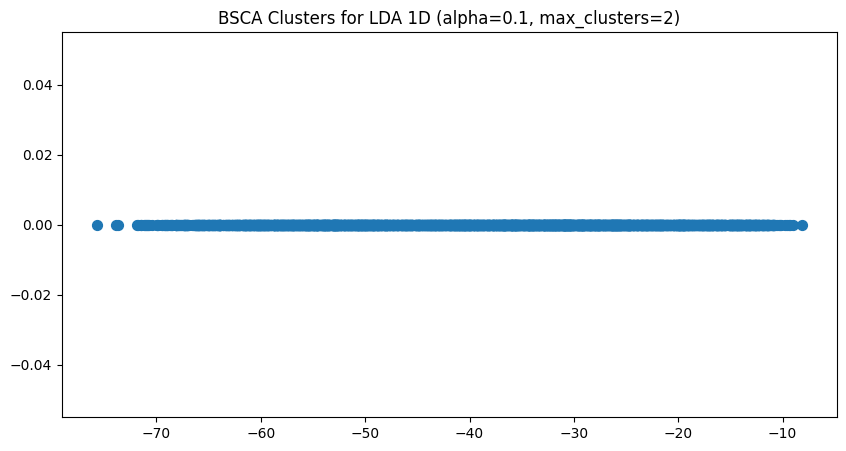

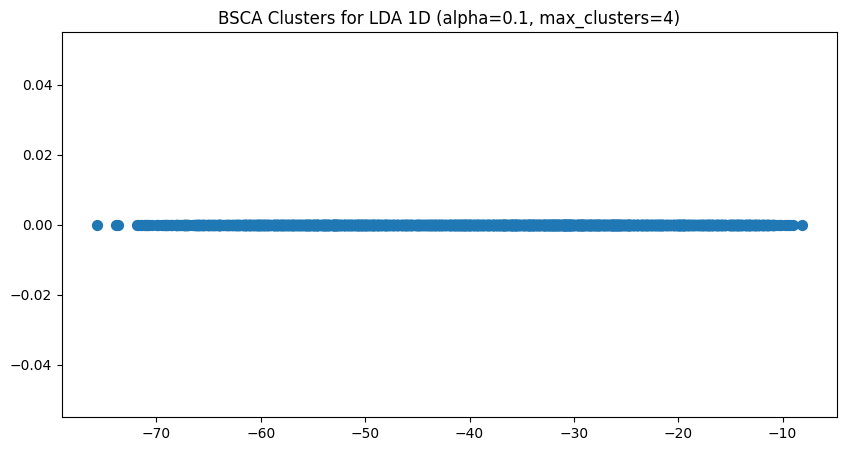

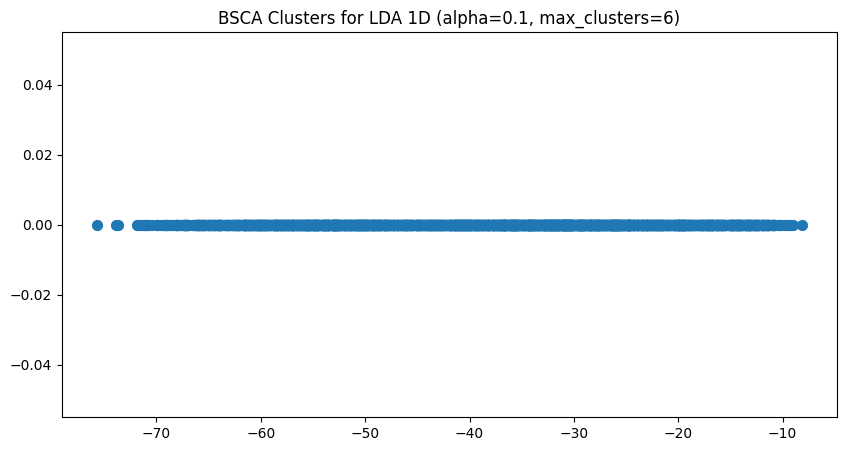

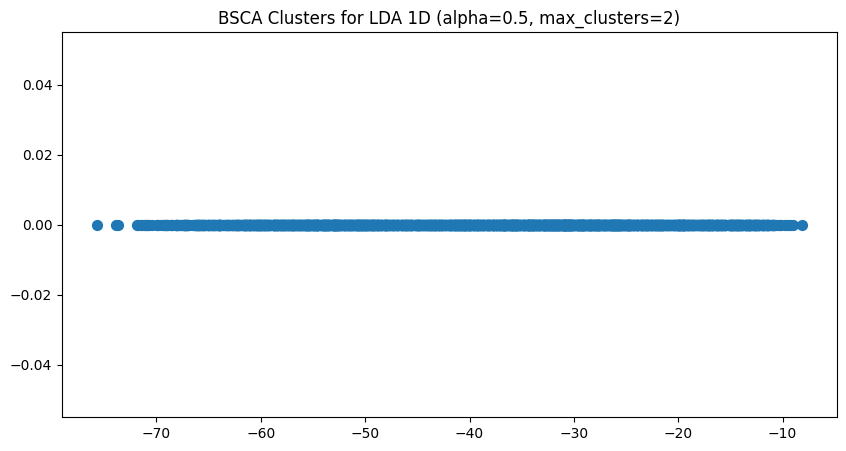

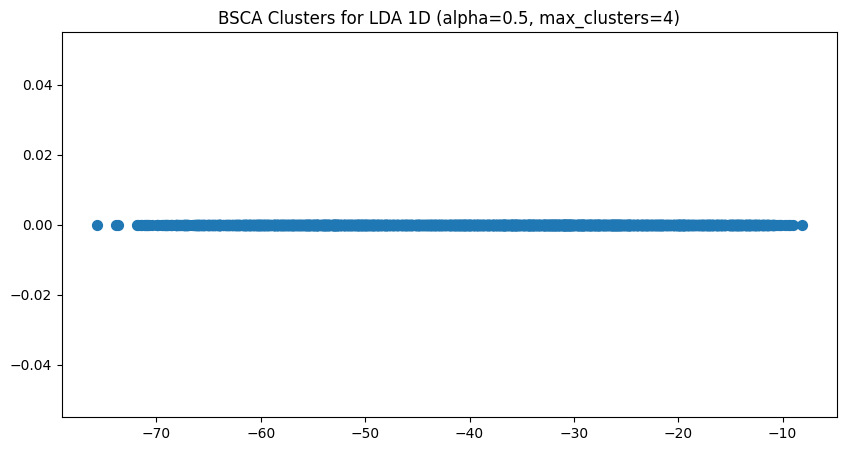

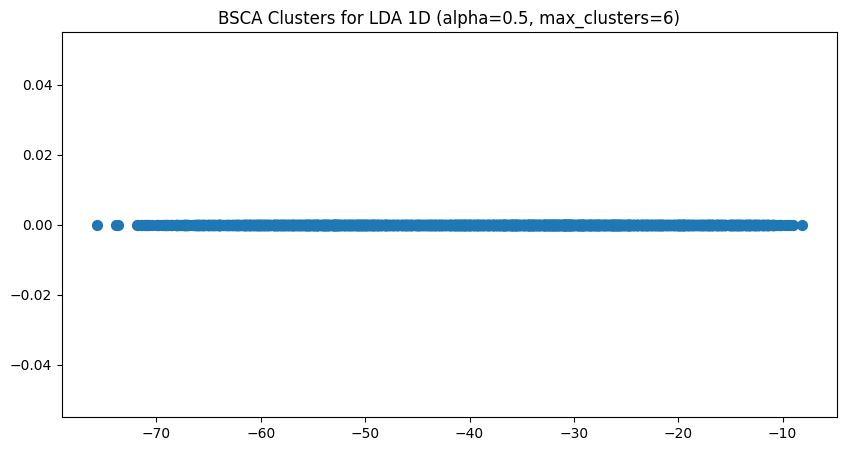

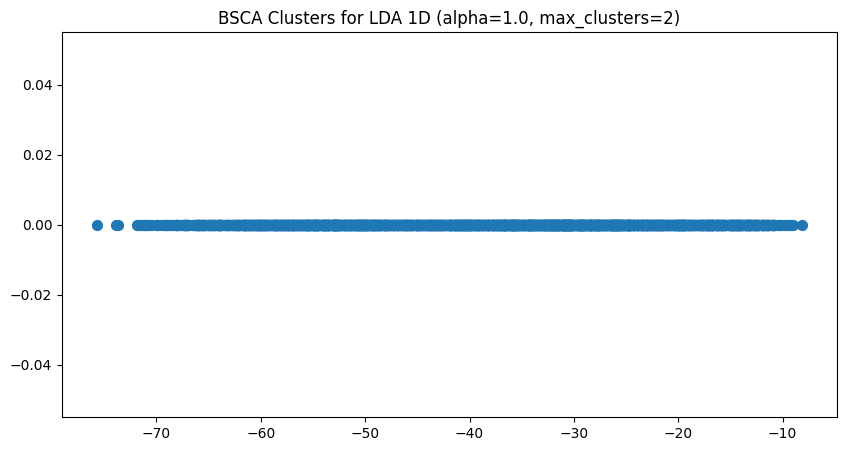

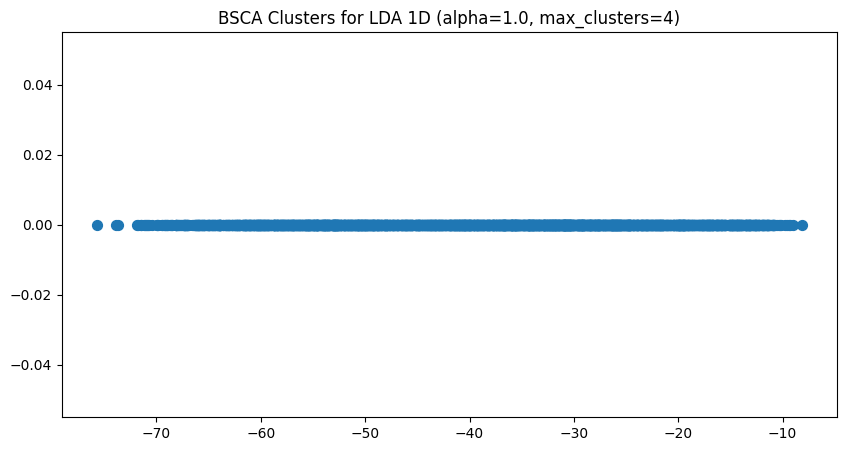

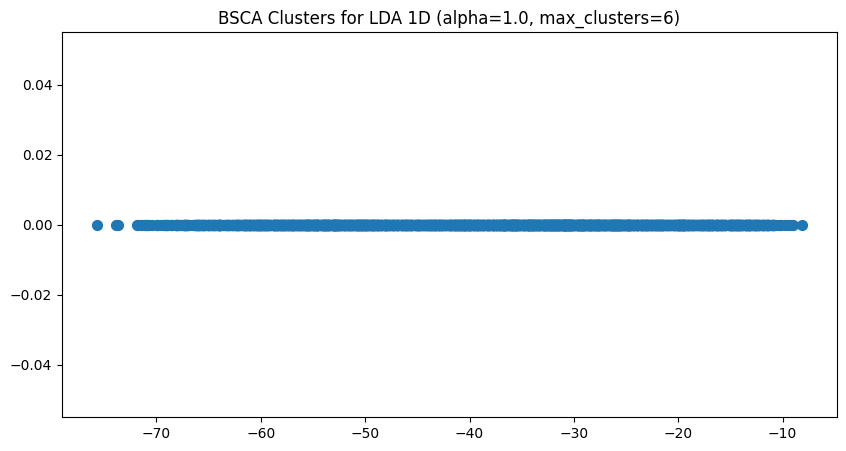

In [ ]:
for alpha in alphas:
    for max_clusters in max_clusters_list:
        # Placeholder for simplified clustering - not an exact replica of function
        plt.figure(figsize=(10, 5))
        # Direct scatter plot as an example - adjust based on clustering logic
        plt.scatter(lda_1d.flatten(), np.zeros_like(lda_1d.flatten()), s=50)
        plt.title(f'BSCA Clusters for LDA 1D (alpha={alpha}, max_clusters={max_clusters})')
        plt.show()


The following code proceeds through several combinations of dissimilarity thresholds (alpha) and maximum cluster numbers (max_clusters) to show clustering on 1-dimensional LDA-transformed data. It generates a scatter plot for every value combinations, displaying the data points on a single axis for simulating clustering results. These visualizations are presented with various alpha and max_clusters values to show that these factors affect the assumed clustering. This visualization approach helps in understanding the parameter effects on data grouping, consequently improving in maximizing the effectiveness of clustering parameters for LDA data.

4. Conclusion:

---

The study successfully shows the use and relevance of dimensionality reduction techniques such as PCA and LDA, which are complemented with a modified BSCA-inspired clustering algorithm. The work shows that dissimilarity thresholds (alphas) and cluster counts impact clustering outcomes across 1-dimensional and 2-dimensional PCA and LDA-transformed datasets using systematic testing. The graphical represengtation particularly useful for showing clustering distribution in lower dimensions, show the complex changes in data grouping under different conditions.This analysis not only confirms the effectiveness of PCA and LDA in capturing variance and class separability, but also highlights the adaptability of the modified BSCA method in identifying underlying structures of data. Such an approach connects basic dimensionality reduction with advanced clustering methods, offering an extensive set of tools for evaluating complex data as well as potentially enhancing predictive modeling strategies.